### 7. Power Spectra Calculation

Here we compute the noise-corrected power spectra of WMAP, as given by  

$$
C_{\ell} = \frac{C_{\ell}^{\text{sky}}-N_\ell}{|w_{\ell m}|^2 B_\ell^2}
$$

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import pymaster as nmt
from tqdm import tqdm

Read all the data

In [7]:
# READ DATA

# Full-mission maps
map_23 = hp.read_map('../data/maps/wmap_iqumap_r9_9yr_K1_v5.fits', field=[0,1,2])

# Noise for WMAP
noise_23_10 = np.loadtxt('../results/spectra/mean_noise_23ghz_galcut10.txt', skiprows=1)

# Mask
mask_galcut10 = hp.read_map('../results/masks/mask_galcut10_apodC2_5.fits')

# BTF and Window function
beam_wmap_k = np.loadtxt('../results/window/beam_wmap_k.txt')[1]
window_pixel = np.loadtxt('../results/window/window_pixel_0512.txt')[1]

# USEFUL PARAMS
nside = 512
npix = hp.nside2npix(nside)
lmax = 2*nside
dl = 10

Compute the Power Spectra

In [ ]:
import sys

sys.path.append("../")
from utils import auto_spectrum

cl_23_10 = auto_spectrum(mask_galcut10, map_23, lmax=lmax, dl=dl, nside=nside, purify_e=True, purify_b=True, beam=None)

Save data

In [10]:
ell = cl_23_10[0]

corr_23_10 = np.abs(cl_23_10 - noise_23_10) / (beam_wmap_k**2 * window_pixel**2)
corr_23_10[0] = ell

names_auto = ['ell', 'TT', 'EE', 'BB', 'TE', 'TB', 'EB']

# te lo guardas
with open('../results/spectra/cl_23ghz_galcut10.txt', 'w') as f:
    f.write('\t'.join(names_auto) + '\n')
    np.savetxt(f, corr_23_10, fmt='%.12e', delimiter='\t')

Plot data

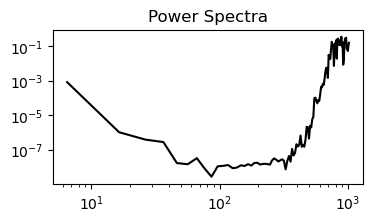

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))

ax.plot(corr_23_10[0, :], corr_23_10[2,:], c='k', alpha=1)

ax.set_title('Power Spectra')
ax.set_xscale('log')
ax.set_yscale('log')